In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## GOLD prices prediction with Regression and Decission tree models, Feature engineering, EDA 
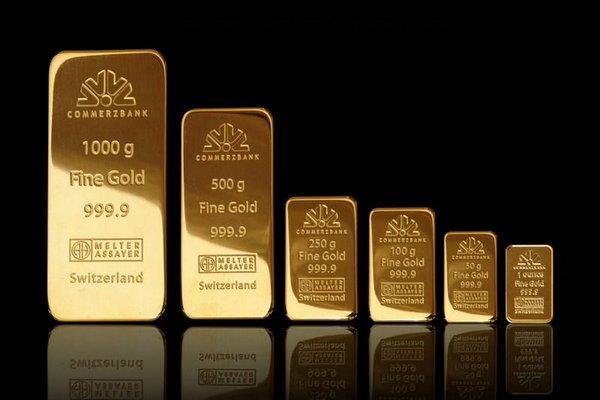

## The main goal is: 
to see how Crude oil price, interest rate (repo rate), Indian currency price in dollars, Sensex (BSE), Inflation rate and US Dollar index **will follow a relationship with the gold price** and make Gold price predictions.

In [49]:
# All the imports
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
# from statsmodels.tsa.arima_model import ARIMA
# from pmdarima.arima import auto_arima
# import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from sklearn.model_selection import train_test_split
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

In [4]:
print('Shape of this DataFrame is:', gold.shape)
gold.head()

Shape of this DataFrame is: (239, 8)


Date  Gold_Price  Crude_Oil  Interest_Rate    USD_INR   Sensex  \
0  01-10-2000        4538    1455.51            8.0  46.318297  3711.02   
1  01-11-2000        4483    1512.47            8.0  46.783613  3997.99   
2  01-12-2000        4541    1178.11            8.0  46.745856  3972.12   
3  01-01-2001        4466    1208.18            8.0  46.536033  4326.72   
4  01-02-2001        4370    1267.18            7.5  46.514595  4247.04   

     CPI  USD_Index  
0  37.23     116.65  
1  37.31     115.24  
2  36.98     109.56  
3  36.90     110.52  
4  36.73     112.01

**Column definitions:**
 - Date - Monthly Data from October 2000 to August 2020;
 - Gold_Price - Gold Prices for the same period;
 - Crude_Oil - Crude Oil Prices;
 - Interest_Rate - Interest rate;
 - USD_INR - Exchange rate of Dollar to Rupees;
 - Sensex - Sensex Value, indicating the relative prices of shares on the Mumbai (Bombay) Stock Exchange;
 - CPI - Consumer Price Index;
 - USD_Index - US Dollar Index.

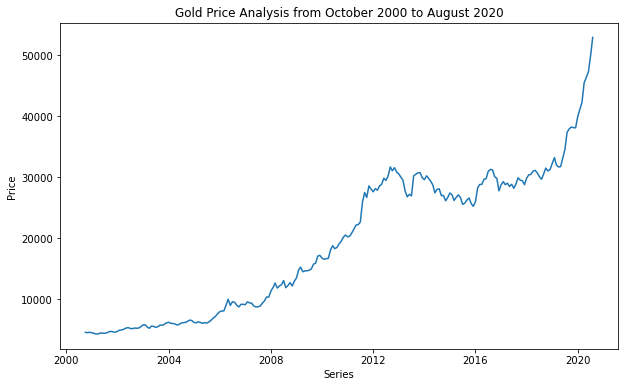

In [153]:
gold = pd.read_csv('https://github.com/girzad/SDA_PP_R/blob/dc45b722e339e9406b7222aa406baa528b87a41f/GoldUP.csv?raw=true')
gold.Date = pd.to_datetime(gold.Date, format="%d-%m-%Y")
# price = pd.DataFrame(data=gold['Gold_Price'], columns=['Gold_Price'], index=gold.Date).dropna()
plt.plot(gold.Date, gold.Gold_Price)
plt.rcParams["figure.figsize"] = (16,10)

plt.ylabel('Price')
plt.xlabel('Series')
plt.title('Gold Price Analysis from October 2000 to August 2020')
plt.show()

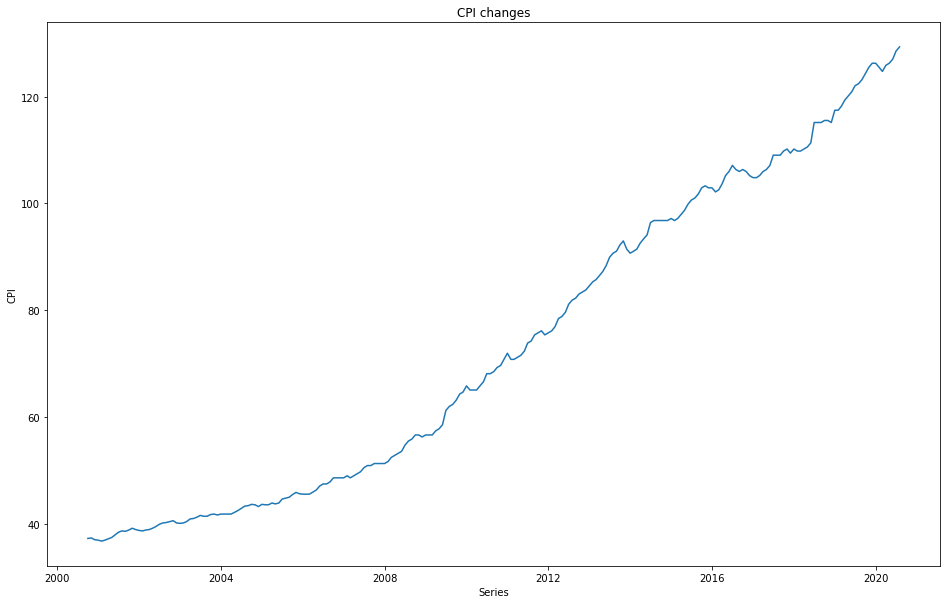

In [154]:
plt.plot(gold.Date, gold.CPI)
plt.rcParams["figure.figsize"] = (16,10)

plt.ylabel('CPI')
plt.xlabel('Series')
plt.title('CPI changes')
plt.show()

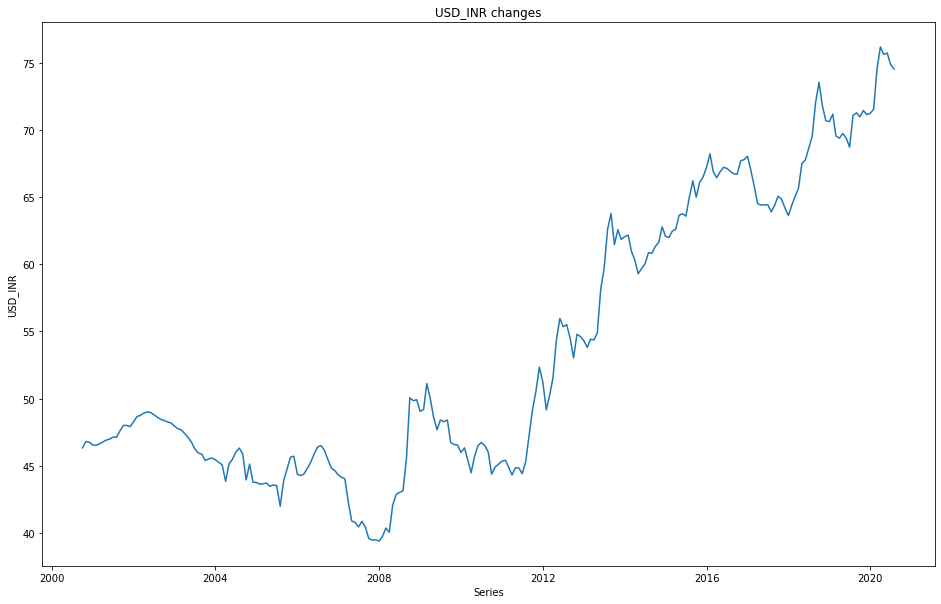

In [155]:
plt.plot(gold.Date, gold.USD_INR)
plt.rcParams["figure.figsize"] = (16,10)

plt.ylabel('USD_INR')
plt.xlabel('Series')
plt.title('USD_INR changes')
plt.show()

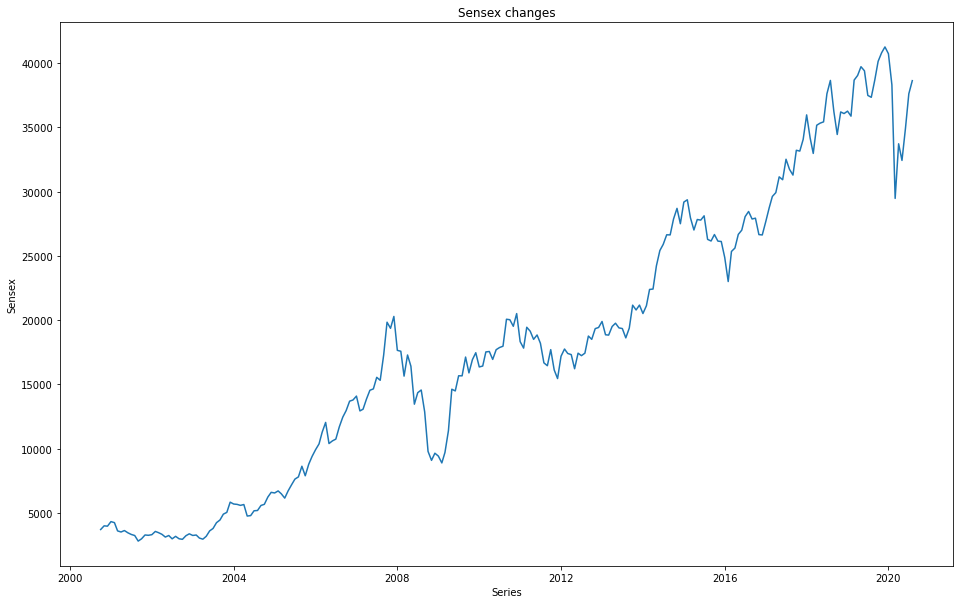

In [156]:
plt.plot(gold.Date, gold.Sensex)
plt.rcParams["figure.figsize"] = (16,10)

plt.ylabel('Sensex')
plt.xlabel('Series')
plt.title('Sensex changes')
plt.show()

In [83]:
gold.head()

Date  Gold_Price  Crude_Oil  Interest_Rate    USD_INR   Sensex    CPI  \
0 2000-10-01        4538    1455.51            8.0  46.318297  3711.02  37.23   
1 2000-11-01        4483    1512.47            8.0  46.783613  3997.99  37.31   
2 2000-12-01        4541    1178.11            8.0  46.745856  3972.12  36.98   
3 2001-01-01        4466    1208.18            8.0  46.536033  4326.72  36.90   
4 2001-02-01        4370    1267.18            7.5  46.514595  4247.04  36.73   

   USD_Index  
0     116.65  
1     115.24  
2     109.56  
3     110.52  
4     112.01

In [88]:
gold.index = gold.Date

In [89]:
gold.head()

Date  Gold_Price  Crude_Oil  Interest_Rate    USD_INR  \
Date                                                                     
2000-10-01 2000-10-01        4538    1455.51            8.0  46.318297   
2000-11-01 2000-11-01        4483    1512.47            8.0  46.783613   
2000-12-01 2000-12-01        4541    1178.11            8.0  46.745856   
2001-01-01 2001-01-01        4466    1208.18            8.0  46.536033   
2001-02-01 2001-02-01        4370    1267.18            7.5  46.514595   

             Sensex    CPI  USD_Index  
Date                                   
2000-10-01  3711.02  37.23     116.65  
2000-11-01  3997.99  37.31     115.24  
2000-12-01  3972.12  36.98     109.56  
2001-01-01  4326.72  36.90     110.52  
2001-02-01  4247.04  36.73     112.01

In [6]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           239 non-null    datetime64[ns]
 1   Gold_Price     239 non-null    int64         
 2   Crude_Oil      239 non-null    float64       
 3   Interest_Rate  239 non-null    float64       
 4   USD_INR        239 non-null    float64       
 5   Sensex         239 non-null    float64       
 6   CPI            239 non-null    float64       
 7   USD_Index      239 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 15.1 KB


In [7]:
from pandas_profiling import ProfileReport
profile = ProfileReport(gold, title="Gold Dataset", html={'style': {'full_width':
                        True}}, sort=None)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
gold["ln_price"] = np.log(gold.Gold_Price)

Skewness: %f 0.2488536311924413
Kurtosis: -0.995847


C:\Users\simon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


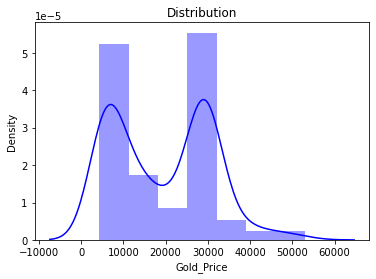

In [64]:
sns.distplot(gold['Gold_Price'], color = 'blue').set(title='Distribution')
print('Skewness: %f', gold['Gold_Price'].skew())
print("Kurtosis: %f" % gold['Gold_Price'].kurt())

## Testing statsmodels.api

In [90]:
idx = gold.Date < '2018-01-01'
X_tr = gold[idx].drop(columns=['Gold_Price', 'Date'])
X_te = gold[~idx].drop(columns=['Gold_Price', 'Date'])
y_train = gold[idx].Gold_Price
y_test = gold[~idx].Gold_Price
date_train = gold[idx].Date
date_test = gold[~idx].Date

In [91]:
features = ['Crude_Oil', 'USD_INR', 'Sensex','CPI']
X_train = X_tr[features]
X_test = X_te[features]

X_train.shape, X_test.shape

((207, 4), (32, 4))

In [14]:
X_tr.shape, X_te.shape

((207, 7), (32, 7))

In [19]:
import statsmodels.api as sm 
y = gold.Gold_Price
X = gold.CPI
x_train = sm.add_constant(X)

C:\Users\simon\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
model = sm.OLS(y, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gold_Price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     2717.
Date:                Sun, 13 Feb 2022   Prob (F-statistic):          7.83e-132
Time:                        11:42:41   Log-Likelihood:                -2275.3
No. Observations:                 239   AIC:                             4555.
Df Residuals:                     237   BIC:                             4562.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8911.8340    582.067    -15.311      0.000   -1.01e+04   -7765.148
CPI          384.4911      7.376     52.126      0.000     369.960     399.022
==============================================================================
Omnibus:                       43.859   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.817
Skew:                           1.130   Prob(JB):                     2.29e-14
Kurtosis:                       4.096   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:
model can explain 92% data.

In [21]:
#Functions to validate our models

def rmse(y_test, y_pred):
    """root mean squared error"""
    return round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

def mae(y_test, y_pred):
    return round(mean_absolute_error(y_test, y_pred), 3)

def mape(y_test, y_pred):
    return round(mean_absolute_percentage_error(y_test, y_pred), 3)

def wmape(y_test, y_pred):
    wmape = sum(np.abs(y_test-y_pred)) / sum(np.abs(y_test))
    return round(wmape, 4)

## Splitting sample to test and train

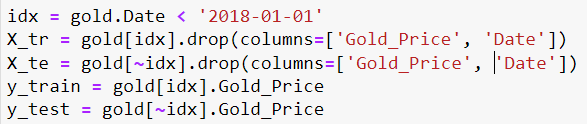

### Single variable Linear regression
`CPI`

CPI has the highest correlation rates.

In [102]:
features = ['CPI']
X_train = X_tr[features]
X_test = X_te[features]

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)


print(f'MAPE: {mape(y_test, y_pred)}')
print(f'WMAPE: {wmape(y_test, y_pred)}')

print(f'MAE: {mae(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')

MAPE: 0.122
WMAPE: 0.1204
MAE: 4329.663
RMSE: 4884.599


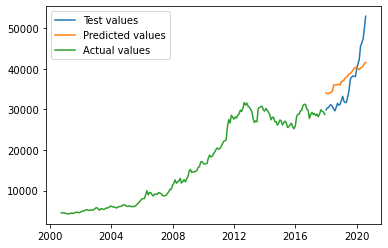

In [103]:
plt.plot(date_test, y_test, label = "Test values")
plt.plot(date_test, y_pred, label = "Predicted values")
plt.plot(date_train, y_train, label = "Actual values")
plt.legend()
plt.show()

### Single variable Linear regression
`Crude oil`

In [128]:
features = ['Crude_Oil']
X_train = X_tr[features]
X_test = X_te[features]

lr_cr = LinearRegression()
reg = lr_cr.fit(X_train, y_train)
y_pred = reg.predict(X_test)


print(f'MAPE: {mape(y_test, y_pred)}')
print(f'WMAPE: {wmape(y_test, y_pred)}')

print(f'MAE: {mae(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')

MAPE: 0.393
WMAPE: 0.4235
MAE: 15236.132
RMSE: 18227.696


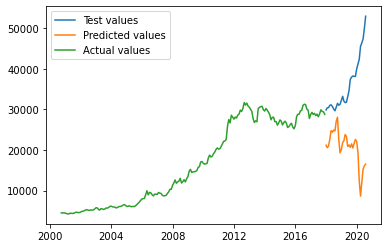

In [130]:
# plot lines
plt.plot(date_test, y_test, label = "Test values")
plt.plot(date_test, y_pred, label = "Predicted values")
plt.plot(date_train, y_train, label = "Actual values")
plt.legend()
plt.show()

## Multiple variable Linear regression

Most correlated variables chosen: `Crude_Oil`, `USD_INR`, `Sensex`,`CPI`
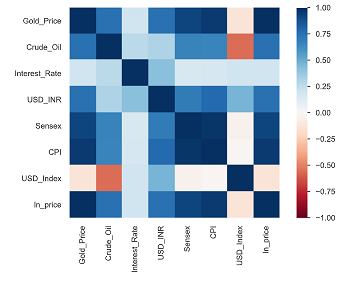

In [147]:
features = ['Crude_Oil', 'USD_INR', 'Sensex','CPI']
X_train = X_tr[features]
X_test = X_te[features]

lr_mult = LinearRegression()
reg = lr_mult.fit(X_train, y_train)
y_pred = reg.predict(X_test)


print(f'MAPE: {mape(y_test, y_pred)}')
print(f'WMAPE: {wmape(y_test, y_pred)}')

print(f'MAE: {mae(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')

MAPE: 0.084
WMAPE: 0.1002
MAE: 3605.235
RMSE: 5878.871


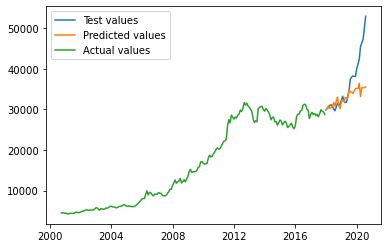

In [148]:
# plot lines
plt.plot(date_test, y_test, label = "Test values")
plt.plot(date_test, y_pred, label = "Predicted values")
plt.plot(date_train, y_train, label = "Actual values")
plt.legend()
plt.show()

# Multiple variables Linear regression - best prediction

Variables: `USD_INR`, `Sensex`,`CPI`

In [150]:
features = ['USD_INR', 'Sensex','CPI']
X_train = X_tr[features]
X_test = X_te[features]

lr_mult = LinearRegression()
reg = lr_mult.fit(X_train, y_train)
y_pred = reg.predict(X_test)


print(f'MAPE: {mape(y_test, y_pred)}')
print(f'WMAPE: {wmape(y_test, y_pred)}')

print(f'MAE: {mae(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')

MAPE: 0.08
WMAPE: 0.0919
MAE: 3304.837
RMSE: 4964.949


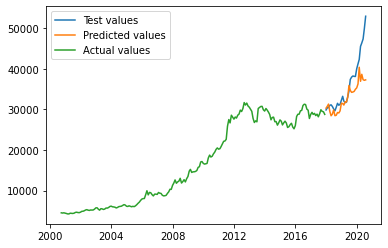

In [151]:
# plot lines
plt.plot(date_test, y_test, label = "Test values")
plt.plot(date_test, y_pred, label = "Predicted values")
plt.plot(date_train, y_train, label = "Actual values")
plt.legend()
plt.show()

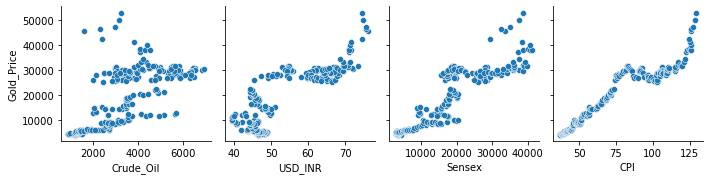

In [35]:
sns.pairplot(data=gold, x_vars=['Crude_Oil', 'USD_INR', 'Sensex','CPI'], y_vars=["Gold_Price"])

## Feature enginearing
Interaction features

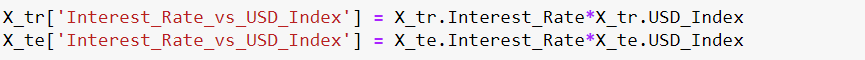

In [104]:

X_tr['Interest_Rate_vs_USD_Index'] = X_tr.Interest_Rate*X_tr.USD_Index
X_te['Interest_Rate_vs_USD_Index'] = X_te.Interest_Rate*X_te.USD_Index

features = ['Crude_Oil', 'USD_INR', 'Sensex','CPI', 'Interest_Rate_vs_USD_Index']
X_train = X_tr[features]
X_test = X_te[features]

lr_mult = LinearRegression()
reg = lr_mult.fit(X_train, y_train)
y_pred = reg.predict(X_test)


print(f'MAPE: {mape(y_test, y_pred)}')
print(f'WMAPE: {wmape(y_test, y_pred)}')

print(f'MAE: {mae(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')

MAPE: 0.093
WMAPE: 0.1107
MAE: 3982.566
RMSE: 6445.761


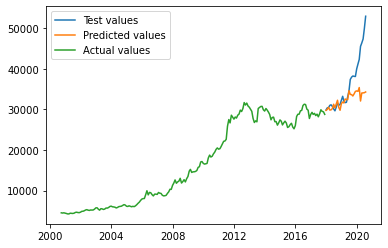

In [105]:
plt.plot(date_test, y_test, label = "Test values")
plt.plot(date_test, y_pred, label = "Predicted values")
plt.plot(date_train, y_train, label = "Actual values")
plt.legend()
plt.show()

## Decission tree

In [135]:
features = ['Crude_Oil', 'USD_INR', 'Sensex','CPI']
X_train = X_tr[features]
X_test = X_te[features]

dtr = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_split=5)
tree_model = dtr.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)


print('******* Decision Tree, max_depth=2 *******')
print()
print(f'Validation MAPE: {mape(y_test, y_pred)}')
print(f'Validation WMAPE: {wmape(y_test, y_pred)}')
print(f'Validation MAE: {mae(y_test, y_pred)}')
print(f'Validation RMSE: {rmse(y_test, y_pred)}')

******* Decision Tree, max_depth=2 *******

Validation MAPE: 0.158
Validation WMAPE: 0.1799
Validation MAE: 6473.353
Validation RMSE: 8951.528


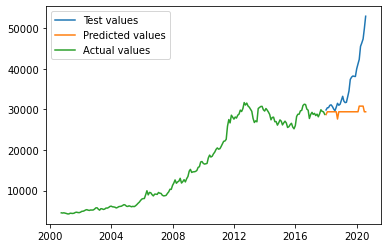

In [136]:
plt.plot(date_test, y_test, label = "Test values")
plt.plot(date_test, y_pred, label = "Predicted values")
plt.plot(date_train, y_train, label = "Actual values")
plt.legend()
plt.show()

In [116]:
!pip install eli5
!pip install pdpbox
!pip install shop

  Using cached PDPbox-0.2.1-py3-none-any.whl
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\simon\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\simon\\AppData\\Local\\Temp\\pip-install-1nn2uir3\\matplotlib_744f41044d7c4d2b9f34076de9bd83bb\\setup.py'"'"'; __file__='"'"'C:\\Users\\simon\\AppData\\Local\\Temp\\pip-install-1nn2uir3\\matplotlib_744f41044d7c4d2b9f34076de9bd83bb\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\simon\AppData\Local\Temp\pip-wheel-x2jcmnn8'
       cwd: C:\Users\simon\AppData\Local\Temp\pip-install-1nn2uir3\matplotlib_744f41044d7c4d2b9f34076de9bd83bb\
  Complete output (499 lines):
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.1.1]
      

    copying lib\mpl_toolkits\axes_grid\grid_helper_curvelinear.py -> build\lib.win-amd64-3.9\mpl_toolkits\axes_grid
    copying lib\mpl_toolkits\axes_grid\inset_locator.py -> build\lib.win-amd64-3.9\mpl_toolkits\axes_grid
    copying lib\mpl_toolkits\axes_grid\parasite_axes.py -> build\lib.win-amd64-3.9\mpl_toolkits\axes_grid
    copying lib\mpl_toolkits\axes_grid\__init__.py -> build\lib.win-amd64-3.9\mpl_toolkits\axes_grid
    creating build\lib.win-amd64-3.9\mpl_toolkits\axes_grid1
    copying lib\mpl_toolkits\axes_grid1\anchored_artists.py -> build\lib.win-amd64-3.9\mpl_toolkits\axes_grid1
    copying lib\mpl_toolkits\axes_grid1\axes_divider.py -> build\lib.win-amd64-3.9\mpl_toolkits\axes_grid1
    copying lib\mpl_toolkits\axes_grid1\axes_grid.py -> build\lib.win-amd64-3.9\mpl_toolkits\axes_grid1
    copying lib\mpl_toolkits\axes_grid1\axes_rgb.py -> build\lib.win-amd64-3.9\mpl_toolkits\axes_grid1
    copying lib\mpl_toolkits\axes_grid1\axes_size.py -> build\lib.win-amd64-3.9\mpl_t

In [121]:
!pip install shap

In [122]:
# Partial Dependence Plots
from sklearn import tree
from matplotlib import pyplot as plt
import shap

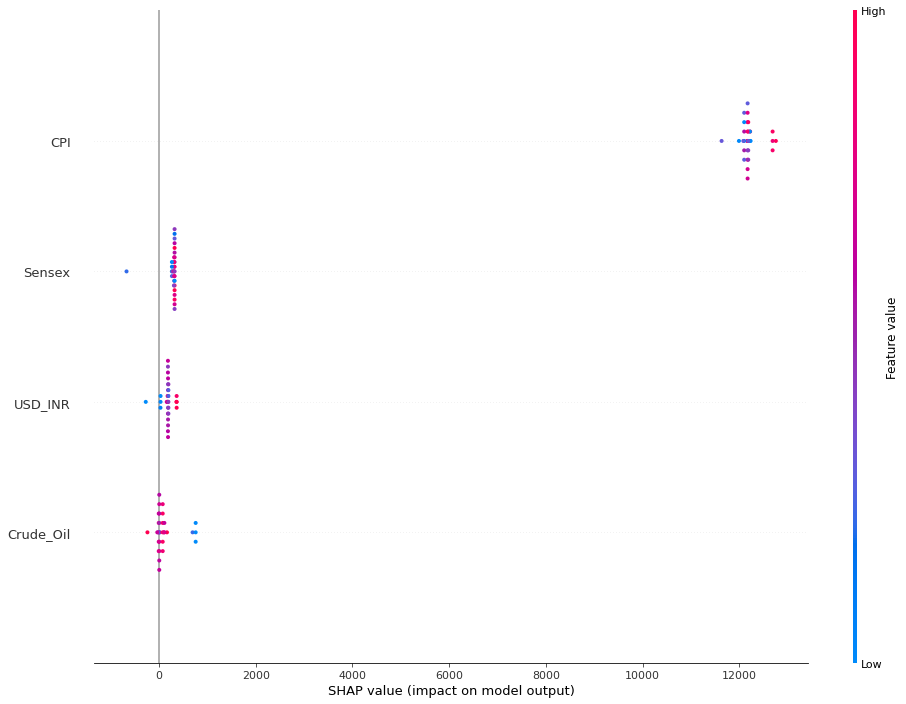

In [137]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(tree_model)

# Calculate shap_values for all data points.
shap_values = explainer.shap_values(X_test)

# Make plot
shap.summary_plot(shap_values, X_test, plot_size=[16,12])